# Reading Dataset

In [1]:
import pandas as pd

In [2]:
# Read the CSV file into a DataFrame
df = []
df = pd.read_csv('new_data_set_all_indicator.csv')
# Optional: display the first few rows

In [125]:
len(set(df['Symbol']))

220

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1964328 entries, 0 to 1964327
Data columns (total 31 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Date               object 
 2   Close              float64
 3   High               float64
 4   Low                float64
 5   Open               float64
 6   Volume             int64  
 7   Symbol             object 
 8   Prev_Open          float64
 9   Prev_Close         float64
 10  Doji               bool   
 11  Hammer             bool   
 12  Shooting_Star      bool   
 13  Bullish_Engulfing  bool   
 14  Bearish_Engulfing  bool   
 15  Sector             object 
 16  ema_12             float64
 17  ema_26             float64
 18  ema_short          float64
 19  MACD_12_26_9       float64
 20  MACDh_12_26_9      float64
 21  MACDs_12_26_9      float64
 22  rsi                float64
 23  BBL_3_2.0          float64
 24  BBM_3_2.0          float64
 25  BBU_3_2.0         

In [5]:
from tqdm import tqdm  # Import tqdm for progress bar
import numpy as np

def encode_ohlc_as_array(sample_df):
    # OHLC order assumed
    window = sample_df[['Open', 'High', 'Low', 'Close']].values
    if window.shape != (3, 4):
        return np.nan  # handle malformed input gracefully
    array = window.T  # shape (4, 3)
    return array[..., np.newaxis]  # shape (4, 3, 1)

# Sort and prepare
df = df.sort_values(['Symbol', 'Date']).reset_index(drop=True)
window_size = 3
encoded_data = []

# Initialize tqdm for progress bar with the total number of symbols
for symbol, group in tqdm(df.groupby('Symbol'), desc="Processing symbols"):
    group = group.reset_index(drop=True)
    for i in tqdm(range(len(group) - window_size + 1), desc=f"Processing {symbol}", leave=False):
        sample = group.loc[i:i+window_size-1]
        encoded_array = encode_ohlc_as_array(sample)
        encoded_data.append((group.loc[i + window_size - 1, 'Date'], symbol, encoded_array))

# Make a small DataFrame for the encoded images
img_df = pd.DataFrame(encoded_data, columns=['Date', 'Symbol', 'cnn_array'])

# Merge with main DataFrame
df = pd.merge(df, img_df, on=['Symbol', 'Date'], how='left')

print("Processing complete!")

Processing ABBV:  75%|████████████████████████████████████████████▉               | 2259/3015 [00:02<00:00, 907.92it/s]


Processing ACN:  72%|███████████████████████████████████████████                 | 4225/5895 [00:03<00:01, 1057.20it/s]


Processing ADI:  34%|███████████████████▉                                       | 3808/11288 [00:03<00:06, 1245.17it/s]


Processing ADM:  81%|███████████████████████████████████████████████▊           | 9136/11288 [00:07<00:01, 1170.75it/s]


Processing AEP:  17%|█████████▉                                                 | 2671/15853 [00:02<00:10, 1212.67it/s]


Processing AIG:  23%|█████████████▌                                             | 3001/13108 [00:02<00:08, 1197.54it/s]


Processing AMAT:   2%|█▎                                                         | 257/11288 [00:00<00:09, 1198.16it/s]


Processing AMD:  44%|██████████████████████████                                 | 4994/11288 [00:04<00:05, 1207.73it/s]


Processing AMT:   2%|█                                                            | 121/6750 [00:00<00:05, 1198.29it/s]


Processing AON:   4%|██▎                                                         | 437/11235 [00:00<00:08, 1216.66it/s]


Processing APD:  58%|██████████████████████████████████                         | 6507/11288 [00:05<00:03, 1201.87it/s]


Processing AXON:  11%|██████▎                                                     | 624/5916 [00:00<00:04, 1155.10it/s]


Processing AXP:  90%|████████████████████████████████████████████████████▍     | 11985/13254 [00:09<00:01, 1181.61it/s]


Processing BA:  47%|████████████████████████████▎                               | 7481/15853 [00:06<00:06, 1222.95it/s]


Processing BAX:  55%|████████████████████████████████▋                          | 6025/10880 [00:05<00:04, 1144.16it/s]


Processing BIDU:  45%|██████████████████████████▌                                | 2197/4879 [00:01<00:02, 1178.02it/s]


Processing BLK:  88%|████████████████████████████████████████████████████▊       | 5585/6348 [00:04<00:00, 1198.61it/s]


Processing C:  25%|███████████████▌                                             | 3076/12097 [00:02<00:07, 1246.23it/s]


Processing CAT:  51%|██████████████████████████████▎                            | 8148/15853 [00:06<00:06, 1167.57it/s]


Processing CCL:  13%|████████                                                    | 1258/9429 [00:01<00:06, 1256.37it/s]


Processing CGNX:  37%|█████████████████████▋                                     | 3279/8926 [00:02<00:04, 1268.89it/s]


Processing CI:   0%|                                                                         | 0/10773 [00:00<?, ?it/s]


Processing CL:  49%|█████████████████████████████▋                              | 6446/13025 [00:05<00:05, 1172.68it/s]


Processing CLX:  82%|███████████████████████████████████████████████▎          | 10657/13074 [00:08<00:01, 1245.83it/s]


Processing COF:  39%|███████████████████████▋                                    | 2987/7578 [00:02<00:04, 1020.51it/s]


Processing COST:  16%|█████████▊                                                  | 1578/9693 [00:01<00:08, 968.79it/s]


Processing CSCO:  19%|███████████▍                                               | 1699/8779 [00:01<00:05, 1204.45it/s]


Processing CSX:  84%|█████████████████████████████████████████████████▌         | 9341/11127 [00:08<00:01, 1198.20it/s]


Processing CVS:  65%|██████████████████████████████████████▎                    | 8500/13074 [00:06<00:03, 1234.03it/s]


Processing CVX:  80%|██████████████████████████████████████████████▍           | 12697/15853 [00:10<00:02, 1181.40it/s]


Processing DE:   5%|██▊                                                          | 618/13254 [00:00<00:10, 1214.27it/s]


Processing DGX:  65%|██████████████████████████████████████▉                     | 4575/7051 [00:03<00:02, 1140.58it/s]


Processing DIS:  17%|██████████                                                 | 2696/15853 [00:02<00:10, 1246.17it/s]


Processing DRI:  31%|██████████████████▊                                         | 2345/7459 [00:01<00:04, 1228.30it/s]


Processing EL:   9%|█████▌                                                        | 662/7324 [00:00<00:05, 1224.78it/s]


Processing EPD:  23%|█████████████▉                                              | 1546/6646 [00:01<00:04, 1250.85it/s]


Processing EQT:  51%|█████████████████████████████▉                             | 5732/11288 [00:04<00:04, 1229.29it/s]


Processing ETN:  88%|██████████████████████████████████████████████████▊       | 11619/13254 [00:09<00:01, 1235.68it/s]


Processing EXC:  99%|█████████████████████████████████████████████████████████▌| 12921/13025 [00:10<00:00, 1244.83it/s]


Processing F:  90%|██████████████████████████████████████████████████████▏     | 11965/13254 [00:09<00:01, 1203.68it/s]


Processing FDX:  57%|█████████████████████████████████▋                         | 6736/11776 [00:06<00:04, 1018.69it/s]


Processing FMC:  45%|██████████████████████████▊                                | 5125/11288 [00:04<00:04, 1260.78it/s]


Processing GE:  35%|█████████████████████▍                                       | 5575/15853 [00:05<00:11, 897.86it/s]


Processing GILD:  47%|███████████████████████████▋                               | 3900/8292 [00:03<00:04, 1083.88it/s]


Processing GM:  27%|████████████████▍                                             | 940/3547 [00:00<00:02, 1260.43it/s]


Processing GPC:  33%|███████████████████▍                                       | 3728/11288 [00:03<00:06, 1177.37it/s]


Processing HCA:  82%|█████████████████████████████████████████████████▏          | 2842/3471 [00:02<00:00, 1240.12it/s]


Processing HOG:  16%|█████████▊                                                  | 1577/9694 [00:01<00:06, 1225.77it/s]


Processing HSY:   1%|▋                                                           | 122/11288 [00:00<00:09, 1128.85it/s]


Processing HUM:  55%|████████████████████████████████▌                          | 5971/10835 [00:04<00:03, 1223.73it/s]


Processing IBM:  37%|█████████████████████▋                                     | 5827/15853 [00:04<00:08, 1169.04it/s]


Processing INTC:  17%|██████████                                                | 1953/11288 [00:01<00:08, 1122.65it/s]


Processing JBLU:  24%|██████████████                                             | 1361/5715 [00:01<00:03, 1266.55it/s]


Processing JNJ:  18%|██████████▋                                                | 2866/15853 [00:02<00:10, 1222.18it/s]


Processing JPM:  36%|█████████████████████▏                                     | 4056/11288 [00:03<00:05, 1230.28it/s]


Processing KMB:  63%|█████████████████████████████████████▏                     | 7115/11288 [00:06<00:03, 1171.76it/s]


Processing KO:  81%|███████████████████████████████████████████████▌           | 12764/15853 [00:10<00:02, 1141.76it/s]


Processing LMT:   4%|██▌                                                         | 516/12097 [00:00<00:09, 1203.77it/s]


Processing LOW:  49%|████████████████████████████▊                              | 5508/11288 [00:04<00:04, 1179.75it/s]


Processing LRCX:   0%|                                                                       | 0/10242 [00:00<?, ?it/s]


Processing LULU:  76%|████████████████████████████████████████████▊              | 3331/4383 [00:03<00:00, 1202.22it/s]


Processing LYV:  95%|████████████████████████████████████████████████████████▊   | 4527/4783 [00:03<00:00, 1227.89it/s]


Processing MCD:  80%|██████████████████████████████████████████████▎           | 11757/14718 [00:09<00:02, 1235.81it/s]


Processing MCO:  80%|████████████████████████████████████████████████▏           | 6092/7590 [00:05<00:01, 1183.05it/s]


Processing MDT:  72%|██████████████████████████████████████████▍                | 9365/13025 [00:07<00:02, 1235.20it/s]


Processing META:  70%|█████████████████████████████████████████▏                 | 2211/3170 [00:01<00:00, 1236.12it/s]


Processing MMC:  49%|████████████████████████████▉                              | 6407/13074 [00:05<00:05, 1202.21it/s]


Processing MMM:  65%|█████████████████████████████████████▍                    | 10232/15853 [00:08<00:04, 1205.89it/s]


Processing MO:   8%|████▊                                                        | 1250/15853 [00:01<00:14, 986.06it/s]


Processing MPWR:  43%|█████████████████████████▏                                 | 2162/5057 [00:01<00:02, 1195.05it/s]


Processing MRK:  89%|███████████████████████████████████████████████████▌      | 14092/15853 [00:11<00:01, 1223.17it/s]


Processing MSFT:  21%|████████████▋                                              | 2092/9774 [00:01<00:06, 1228.17it/s]


Processing NAVI:  88%|███████████████████████████████████████████████████▋       | 2354/2690 [00:01<00:00, 1197.11it/s]


Processing NEE:  81%|██████████████████████████████████████████████▉           | 10577/13074 [00:08<00:02, 1190.98it/s]


Processing NFLX:  49%|█████████████████████████████                              | 2801/5686 [00:02<00:02, 1117.54it/s]


Processing NOC:  12%|███████▎                                                    | 1321/10835 [00:02<00:24, 392.78it/s]


Processing NRG:  46%|████████████████████████████                                 | 2444/5301 [00:02<00:03, 881.98it/s]


Processing NTRS:  17%|█████████▊                                                | 1909/11288 [00:01<00:08, 1139.43it/s]


Processing NVAX:  98%|██████████████████████████████████████████████████████████ | 7190/7313 [00:06<00:00, 1209.59it/s]


Processing OKE:  55%|████████████████████████████████▌                          | 6165/11150 [00:05<00:04, 1212.97it/s]


Processing OXY:  14%|████████                                                   | 1482/10835 [00:01<00:07, 1190.02it/s]


Processing PEP:  56%|█████████████████████████████████▎                         | 7470/13254 [00:06<00:05, 1075.46it/s]


Processing PFE:  83%|███████████████████████████████████████████████▉          | 10944/13254 [00:09<00:01, 1183.13it/s]


Processing PG:  92%|██████████████████████████████████████████████████████▏    | 14569/15853 [00:12<00:01, 1218.42it/s]


Processing PHM:  29%|█████████████████                                           | 3218/11288 [00:03<00:09, 874.14it/s]


Processing PLD:  76%|█████████████████████████████████████████████▊              | 5203/6815 [00:05<00:01, 1050.57it/s]


Processing PPL:  20%|███████████▊                                               | 2270/11288 [00:01<00:07, 1179.85it/s]


Processing PRGO:  95%|███████████████████████████████████████████████████████▊   | 7870/8316 [00:06<00:00, 1155.45it/s]


Processing PSA:  93%|██████████████████████████████████████████████████████    | 10358/11117 [00:08<00:00, 1167.59it/s]


Processing QQQ:  23%|█████████████▊                                              | 1500/6491 [00:01<00:04, 1206.05it/s]


Processing REGN:  45%|██████████████████████████▎                                | 3797/8497 [00:03<00:04, 1112.02it/s]


Processing ROST:  36%|█████████████████████                                      | 3533/9923 [00:03<00:06, 1059.69it/s]


Processing RTX:  61%|███████████████████████████████████▉                       | 9627/15790 [00:08<00:05, 1151.53it/s]


Processing SBUX:  37%|█████████████████████▌                                     | 2987/8183 [00:02<00:04, 1111.01it/s]


Processing SHW:  95%|███████████████████████████████████████████████████████▏  | 10750/11288 [00:09<00:00, 1155.07it/s]


Processing SPG:  54%|████████████████████████████████▌                           | 4238/7812 [00:03<00:03, 1129.30it/s]


Processing SPGI:  94%|█████████████████████████████████████████████████████▍   | 12254/13074 [00:10<00:00, 1148.71it/s]


Processing STT:  39%|███████████████████████                                    | 4414/11288 [00:03<00:06, 1131.64it/s]


Processing STZ:  99%|███████████████████████████████████████████████████████████▌| 8198/8254 [00:07<00:00, 1129.54it/s]


Processing SYK:  46%|███████████████████████████▏                               | 5198/11288 [00:04<00:05, 1066.36it/s]


Processing SYY:  76%|████████████████████████████████████████████▋              | 9872/13021 [00:08<00:02, 1124.77it/s]


Processing TDG:  46%|███████████████████████████▌                                | 2173/4727 [00:01<00:02, 1166.56it/s]


Processing TFC:  94%|██████████████████████████████████████████████████████▋   | 10637/11287 [00:09<00:00, 1073.40it/s]


Processing TMO:  16%|█████████▏                                                 | 1754/11288 [00:01<00:08, 1133.00it/s]


Processing TRV:  49%|█████████████████████████████▏                             | 6128/12381 [00:05<00:05, 1081.13it/s]


Processing TSN:  49%|█████████████████████████████▏                             | 5584/11288 [00:05<00:05, 1100.58it/s]


Processing TT:  90%|████████████████████████████████████████████████████▉      | 10120/11288 [00:09<00:01, 1075.30it/s]


Processing UAL:  26%|███████████████▌                                            | 1229/4753 [00:01<00:03, 1136.87it/s]


Processing UPS:  27%|████████████████▍                                           | 1736/6320 [00:01<00:04, 1058.55it/s]


Processing VLO:  64%|█████████████████████████████████████▊                     | 6949/10834 [00:06<00:03, 1131.50it/s]


Processing VMC:  91%|████████████████████████████████████████████████████▌     | 11858/13074 [00:10<00:01, 1087.62it/s]


Processing VRTX:  37%|█████████████████████▌                                     | 3080/8418 [00:02<00:04, 1158.51it/s]


Processing VZ:  31%|██████████████████▋                                         | 3236/10356 [00:02<00:06, 1127.64it/s]


Processing WBA:  75%|████████████████████████████████████████████▍              | 8492/11288 [00:07<00:02, 1102.92it/s]


Processing WELL:  11%|██████▏                                                   | 1200/11286 [00:01<00:08, 1171.45it/s]


Processing WFC:  40%|███████████████████████▌                                   | 5297/13254 [00:05<00:07, 1102.70it/s]


Processing WMT:  53%|███████████████████████████████▎                           | 7015/13194 [00:07<00:06, 1001.90it/s]


Processing XEL:  74%|███████████████████████████████████████████▊               | 9701/13074 [00:08<00:02, 1132.96it/s]


Processing XOM:  77%|████████████████████████████████████████████▊             | 12258/15853 [00:10<00:03, 1099.34it/s]


Processing ZBH:  91%|██████████████████████████████████████████████████████▋     | 5371/5891 [00:04<00:00, 1119.25it/s]


Processing ZTS:  73%|███████████████████████████████████████████▉                | 2195/2994 [00:01<00:00, 1088.33it/s]


Processing symbols: 100%|████████████████████████████████████████████████████████████| 220/220 [28:13<00:00,  7.70s/it]


Processing complete!


In [6]:
# Remove NAN records from CNN Array
df = df[df['cnn_array'].apply(lambda x: isinstance(x, np.ndarray))].reset_index(drop=True)

# List of required columns (target columns for candlestick patterns and OHLC data)
required_columns = ['Open', 'High', 'Low', 'Close', 'Doji', 'Hammer', 'Shooting_Star', 'Bullish_Engulfing', 
                    'Bearish_Engulfing']

# Convert all required columns to numeric values (coerce errors to NaN)
for col in required_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Now, let's ensure that we replace infinities (-inf, inf) and NaNs in any of the columns with proper handling
#df = df.replace([np.inf, -np.inf], np.nan)

# Now drop the rows that contain NaN in any of the required columns
df = df.dropna(subset=required_columns)

# Reset index if needed (optional)
df = df.reset_index(drop=True)

# Display the cleaned DataFrame
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1963888 entries, 0 to 1963887
Data columns (total 32 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Date               object 
 2   Close              float64
 3   High               float64
 4   Low                float64
 5   Open               float64
 6   Volume             int64  
 7   Symbol             object 
 8   Prev_Open          float64
 9   Prev_Close         float64
 10  Doji               bool   
 11  Hammer             bool   
 12  Shooting_Star      bool   
 13  Bullish_Engulfing  bool   
 14  Bearish_Engulfing  bool   
 15  Sector             object 
 16  ema_12             float64
 17  ema_26             float64
 18  ema_short          float64
 19  MACD_12_26_9       float64
 20  MACDh_12_26_9      float64
 21  MACDs_12_26_9      float64
 22  rsi                float64
 23  BBL_3_2.0          float64
 24  BBM_3_2.0          float64
 25  BBU_3_2.0         

In [21]:
# Step 1: Prepare the required columns
# Select only the required columns for your features and labels
features = ['cnn_array']  # The column with CNN-ready data (encoded OHLC)
patterns = ['Doji', 'Hammer', 'Shooting_Star', 'Bullish_Engulfing', 'Bearish_Engulfing']

# Step 2: Extract relevant columns only for train-test split
df_clean = df[['Symbol', 'Date'] + features + patterns]



In [22]:
# Step 1: Filter rows with correct CNN shape (do NOT convert to Series here)
df_clean = df_clean[df_clean['cnn_array'].apply(lambda x: isinstance(x, np.ndarray) and x.shape == (4, 3, 1))]

# Step 2: Separate features and labels
X = df_clean[['cnn_array']]  # Keep this as a DataFrame
y = df_clean[patterns]       # e.g., ['Doji', 'Hammer', ...]

# Step 3: Split data
X_train_df, X_test_df, y_train_df, y_test_df = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 4: Convert cnn_array column to 3D float32 arrays
X_train = np.stack(X_train_df['cnn_array'].values).astype(np.float32)
X_test = np.stack(X_test_df['cnn_array'].values).astype(np.float32)

# Confirm shape: should be (num_samples, 4, 3, 1)
print("X_train shape:", X_train.shape)

X_train shape: (1571110, 4, 3, 1)



🧪 Training model for: Doji
Epoch 1/5
11047/11047 [==============================] - 33s 3ms/step - loss: 0.3592 - accuracy: 0.8881 - val_loss: 0.3449 - val_accuracy: 0.8870
Epoch 2/5
11047/11047 [==============================] - 32s 3ms/step - loss: 0.3402 - accuracy: 0.8889 - val_loss: 0.3390 - val_accuracy: 0.8870
Epoch 3/5
11047/11047 [==============================] - 32s 3ms/step - loss: 0.3385 - accuracy: 0.8889 - val_loss: 0.3436 - val_accuracy: 0.8870
Epoch 4/5
11047/11047 [==============================] - 32s 3ms/step - loss: 0.3368 - accuracy: 0.8889 - val_loss: 0.3407 - val_accuracy: 0.8868
Epoch 5/5
11047/11047 [==============================] - 32s 3ms/step - loss: 0.3362 - accuracy: 0.8889 - val_loss: 0.3399 - val_accuracy: 0.8870
✅ Model saved to: saved_models/cnn_model_Doji.h5
    1/12275 [..............................] - ETA: 17:00

C:\Users\musha\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


12275/12275 [==============================] - 20s 2ms/step
              precision    recall  f1-score   support

   IsPattern       0.89      1.00      0.94    348199
  NotPattern       0.91      0.01      0.02     44579

    accuracy                           0.89    392778
   macro avg       0.90      0.51      0.48    392778
weighted avg       0.89      0.89      0.84    392778



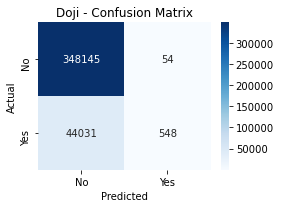


🧪 Training model for: Hammer
Epoch 1/5
11047/11047 [==============================] - 33s 3ms/step - loss: 0.1679 - accuracy: 0.9626 - val_loss: 0.1410 - val_accuracy: 0.9620
Epoch 2/5
11047/11047 [==============================] - 33s 3ms/step - loss: 0.1191 - accuracy: 0.9644 - val_loss: 0.1010 - val_accuracy: 0.9658
Epoch 3/5
11047/11047 [==============================] - 37s 3ms/step - loss: 0.0971 - accuracy: 0.9671 - val_loss: 0.0785 - val_accuracy: 0.9703
Epoch 4/5
11047/11047 [==============================] - 32s 3ms/step - loss: 0.0865 - accuracy: 0.9691 - val_loss: 0.0725 - val_accuracy: 0.9712
Epoch 5/5
11047/11047 [==============================] - 32s 3ms/step - loss: 0.0832 - accuracy: 0.9694 - val_loss: 0.0761 - val_accuracy: 0.9693
✅ Model saved to: saved_models/cnn_model_Hammer.h5
    1/12275 [..............................] - ETA: 17:31

C:\Users\musha\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


12275/12275 [==============================] - 20s 2ms/step
              precision    recall  f1-score   support

   IsPattern       0.97      1.00      0.98    378305
  NotPattern       0.84      0.21      0.33     14473

    accuracy                           0.97    392778
   macro avg       0.90      0.60      0.66    392778
weighted avg       0.97      0.97      0.96    392778



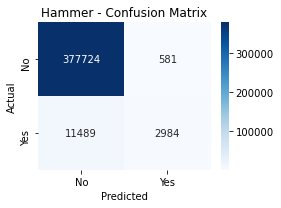


🧪 Training model for: Shooting_Star
Epoch 1/5
11047/11047 [==============================] - 33s 3ms/step - loss: 0.1385 - accuracy: 0.9670 - val_loss: 0.1135 - val_accuracy: 0.9666
Epoch 2/5
11047/11047 [==============================] - 32s 3ms/step - loss: 0.1020 - accuracy: 0.9684 - val_loss: 0.0868 - val_accuracy: 0.9684
Epoch 3/5
11047/11047 [==============================] - 34s 3ms/step - loss: 0.0875 - accuracy: 0.9702 - val_loss: 0.0747 - val_accuracy: 0.9703
Epoch 4/5
11047/11047 [==============================] - 32s 3ms/step - loss: 0.0790 - accuracy: 0.9713 - val_loss: 0.0635 - val_accuracy: 0.9732
Epoch 5/5
11047/11047 [==============================] - 32s 3ms/step - loss: 0.0729 - accuracy: 0.9724 - val_loss: 0.0582 - val_accuracy: 0.9753
✅ Model saved to: saved_models/cnn_model_Shooting_Star.h5
    1/12275 [..............................] - ETA: 19:28

C:\Users\musha\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


12275/12275 [==============================] - 19s 2ms/step
              precision    recall  f1-score   support

   IsPattern       0.98      1.00      0.99    380777
  NotPattern       0.79      0.27      0.41     12001

    accuracy                           0.98    392778
   macro avg       0.89      0.64      0.70    392778
weighted avg       0.97      0.98      0.97    392778



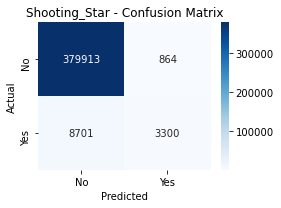


🧪 Training model for: Bullish_Engulfing
Epoch 1/5
11047/11047 [==============================] - 35s 3ms/step - loss: 0.1460 - accuracy: 0.9665 - val_loss: 0.1184 - val_accuracy: 0.9671
Epoch 2/5
11047/11047 [==============================] - 31s 3ms/step - loss: 0.1166 - accuracy: 0.9671 - val_loss: 0.1109 - val_accuracy: 0.9672
Epoch 3/5
11047/11047 [==============================] - 35s 3ms/step - loss: 0.1126 - accuracy: 0.9671 - val_loss: 0.1137 - val_accuracy: 0.9672
Epoch 4/5
11047/11047 [==============================] - 31s 3ms/step - loss: 0.1108 - accuracy: 0.9672 - val_loss: 0.1084 - val_accuracy: 0.9672
Epoch 5/5
11047/11047 [==============================] - 30s 3ms/step - loss: 0.1103 - accuracy: 0.9672 - val_loss: 0.1077 - val_accuracy: 0.9672
✅ Model saved to: saved_models/cnn_model_Bullish_Engulfing.h5


C:\Users\musha\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


12275/12275 [==============================] - 26s 2ms/step


C:\Users\musha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\musha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\musha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

   IsPattern       0.97      1.00      0.98    380612
  NotPattern       0.00      0.00      0.00     12166

    accuracy                           0.97    392778
   macro avg       0.48      0.50      0.49    392778
weighted avg       0.94      0.97      0.95    392778



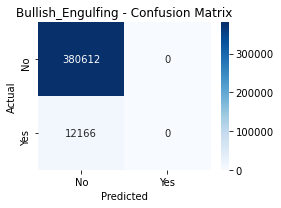


🧪 Training model for: Bearish_Engulfing
Epoch 1/5
11047/11047 [==============================] - 40s 3ms/step - loss: 0.1541 - accuracy: 0.9637 - val_loss: 0.1214 - val_accuracy: 0.9643
Epoch 2/5
11047/11047 [==============================] - 38s 3ms/step - loss: 0.1201 - accuracy: 0.9645 - val_loss: 0.1116 - val_accuracy: 0.9644
Epoch 3/5
11047/11047 [==============================] - 41s 4ms/step - loss: 0.1164 - accuracy: 0.9646 - val_loss: 0.1084 - val_accuracy: 0.9645
Epoch 4/5
11047/11047 [==============================] - 36s 3ms/step - loss: 0.1144 - accuracy: 0.9647 - val_loss: 0.1164 - val_accuracy: 0.9632
Epoch 5/5
11047/11047 [==============================] - 32s 3ms/step - loss: 0.1137 - accuracy: 0.9646 - val_loss: 0.1115 - val_accuracy: 0.9642
✅ Model saved to: saved_models/cnn_model_Bearish_Engulfing.h5
    1/12275 [..............................] - ETA: 19:20

C:\Users\musha\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


12275/12275 [==============================] - 21s 2ms/step
              precision    recall  f1-score   support

   IsPattern       0.97      1.00      0.98    379664
  NotPattern       0.14      0.00      0.00     13114

    accuracy                           0.97    392778
   macro avg       0.55      0.50      0.49    392778
weighted avg       0.94      0.97      0.95    392778



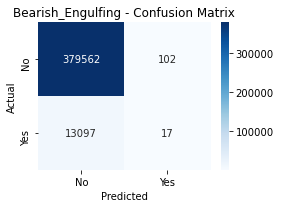

In [28]:
import os
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define CNN model
def build_cnn_model(input_shape=(4, 3, 1)):
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(16, (2, 2), activation='relu', input_shape=input_shape),
        tf.keras.layers.MaxPooling2D((1, 1)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


# Create a directory for saved models if it doesn't exist
os.makedirs('saved_models', exist_ok=True)

# Train model for each pattern
for pattern in patterns:
    print(f"\n🧪 Training model for: {pattern}")
    
    # Get labels for this pattern
    y_train_arr = y_train_df[pattern].astype(np.float32).values
    y_test_arr = y_test_df[pattern].astype(np.float32).values

    # Build and train model
    model = build_cnn_model()
    model.fit(X_train, y_train_arr, epochs=5, batch_size=128, verbose=1, validation_split=0.1)
    
    # ✅ Save the model
    model_path = f"saved_models/cnn_model_{pattern}.h5"
    model.save(model_path)
    print(f"✅ Model saved to: {model_path}")

    # Predict
    y_pred = model.predict(X_test)
    y_pred_bin = (y_pred > 0.5).astype(int)

    # Confusion matrix
    cm = confusion_matrix(y_test_arr, y_pred_bin)
    print(classification_report(y_test_arr, y_pred_bin, target_names=['IsPattern', 'NotPattern']))

    # Plot confusion matrix
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.title(f'{pattern} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

In [35]:
from tensorflow.keras.models import load_model
models = {}
print("\n📊 Loading and evaluating saved models...\n")

for pattern in patterns:
    model_path = f"saved_models/cnn_model_{pattern}.h5"
    if not os.path.exists(model_path):
        print(f"❌ Model not found for {pattern}, skipping.")
        continue

    # Load the model
    models[pattern] = load_model(model_path)
    print(f"\n📦 Loaded model for: {pattern}")


📊 Loading and evaluating saved models...


📦 Loaded model for: Doji

📦 Loaded model for: Hammer

📦 Loaded model for: Shooting_Star

📦 Loaded model for: Bullish_Engulfing

📦 Loaded model for: Bearish_Engulfing


# Profitability Analysis

In [71]:
def calculate_profitability(df):
    df = df.copy()
    df = df.sort_values(['Symbol', 'Date']).reset_index(drop=True)

    # BUY strategy (buy at Open today, sell at Close in future)
    df['buy_profit_n']  = df.groupby('Symbol')['Close'].shift(+0) - df['Open']             # same day
    df['buy_profit_n1'] = df.groupby('Symbol')['Close'].shift(+1) - df['Open']             # next day
    df['buy_profit_n2'] = df.groupby('Symbol')['Close'].shift(+2) - df['Open']             # 2 days later
    df['buy_profit_n3'] = df.groupby('Symbol')['Close'].shift(+3) - df['Open']             # 2 days later

    # SELL strategy (sell at Close today, buy at Open in past)
    df['sell_profit_n']  = df['Close'] - df.groupby('Symbol')['Open'].shift(-0)        # same day
    df['sell_profit_n1'] = df['Close'] - df.groupby('Symbol')['Open'].shift(-1)        # next day
    df['sell_profit_n2'] = df['Close'] - df.groupby('Symbol')['Open'].shift(-2)        # 2 days later
    df['sell_profit_n3'] = df['Close'] - df.groupby('Symbol')['Open'].shift(-3)        # 2 days later

    return df

# Apply to your DataFrame
df_profitability = calculate_profitability(df)



In [72]:
def predict_actions_on_sample(df, models, pattern_weights, sample_size=1000):
    import numpy as np
    import pandas as pd

    # 1. Take random sample
    sample_df = df.sample(n=sample_size, random_state=42).copy()
    
    # 2. Initialize score and action columns
    sample_df['score'] = 0.0
    sample_df['action'] = 'HOLD'
    
    # 3. Run each model on the cnn_array and compute weighted score
    for pattern, model in models.items():
        valid_indices = sample_df['cnn_array'].apply(lambda x: isinstance(x, np.ndarray) and x.shape == (4, 3, 1))
        cnn_input = np.stack(sample_df.loc[valid_indices, 'cnn_array'].values)
        
        preds = model.predict(cnn_input, verbose=0)
        preds_bin = (preds > 0.5).astype(int).flatten()

        # Multiply predictions by weight
        weighted_preds = preds_bin * pattern_weights[pattern]

        # Update score only for valid samples
        sample_df.loc[valid_indices, 'score'] += weighted_preds

    # 4. Assign action based on score
    sample_df['action'] = sample_df['score'].apply(lambda x: 'BUY' if x > 0 else 'SELL' if x < 0 else 'HOLD')
    
    return sample_df


In [73]:
result = predict_actions_on_sample(df_profitability, models, pattern_weights, 100000)

In [74]:
result[result['action'] != 'HOLD']

,Unnamed: 0,Date,Close,High,Low,Open,Volume,Symbol,Prev_Open,Prev_Close,...,buy_profit_n,buy_profit_n1,buy_profit_n2,buy_profit_n3,sell_profit_n,sell_profit_n1,sell_profit_n2,sell_profit_n3,score,action
1959221,1959657,2024-01-11,42.109428,42.264885,41.098957,42.196873,1980000,ZION,42.663242,42.682674,...,-0.087445,0.485801,0.592681,1.078483,-0.087445,-0.233187,1.816908,2.992549,2.0,BUY
205821,205867,1999-05-25,23.709465,24.900115,23.709465,24.188313,4988233,AXP,24.848356,24.188320,...,-0.478848,0.000008,0.711805,1.358906,-0.478848,-0.103537,-1.242425,-0.517681,-2.0,SELL
361615,349598,2016-06-13,223.279999,226.350006,223.039993,223.419998,2818800,CHTR,220.259995,223.529999,...,-0.139999,0.110001,-0.449997,-0.339996,-0.139999,-5.660004,1.429993,0.550003,-2.0,SELL
1268904,1269192,2024-09-19,520.062805,520.968950,515.263076,520.530799,468400,NOC,518.559183,519.435486,...,-0.467993,-1.095313,-1.971656,-1.453772,-0.467993,1.165071,-2.967440,-8.733115,2.0,BUY
1404829,1405145,2002-09-05,9.733050,9.975135,9.704083,9.733050,3259600,PHM,9.455788,9.745461,...,0.000000,0.012411,-0.388990,0.144840,0.000000,-0.186218,-0.002068,-0.401405,-2.0,SELL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1878344,1878766,2018-03-22,41.360916,42.458648,41.031598,41.102164,2715300,WELL,41.509898,41.125694,...,0.258752,0.023530,0.572400,0.650812,0.258752,-0.078412,0.290111,0.478296,-2.0,SELL
1919085,1919513,2023-01-25,64.368279,64.368279,63.326143,64.180509,2527600,XEL,63.851917,64.161736,...,0.187769,-0.018774,-0.328588,0.178400,0.187769,0.826192,0.075102,0.403697,2.0,BUY
944416,944632,1996-06-07,11.252299,11.282305,10.982244,11.222293,5914200,KO,11.462339,11.222290,...,0.030006,-0.000003,0.240044,-0.060016,0.030006,0.000003,0.030008,-0.060087,2.0,BUY
467140,455149,2000-10-23,1.457908,1.469685,1.318947,1.469685,3372000,CTSH,1.448488,1.470274,...,-0.011776,0.000589,0.004710,-0.075368,-0.011776,0.035328,0.030618,-0.044750,2.0,BUY


In [75]:
def print_profitable_trades(df_with_actions):
    """
    Filters and prints trades where action is BUY or SELL and profit is > 0.
    """
    # Create a condition for profitable BUY actions
    buy_condition = (
        (df_with_actions['action'] == 'BUY') &
        (
            (df_with_actions['buy_profit_n'] > 0) |
            (df_with_actions['buy_profit_n1'] > 0) |
            (df_with_actions['buy_profit_n2'] > 0) |
            (df_with_actions['buy_profit_n3'] > 0)
        )
    )

    # Create a condition for profitable SELL actions
    sell_condition = (
        (df_with_actions['action'] == 'SELL') &
        (
            (df_with_actions['sell_profit_n'] > 0) |
            (df_with_actions['sell_profit_n1'] > 0) |
            (df_with_actions['sell_profit_n2'] > 0) |
            (df_with_actions['sell_profit_n3'] > 0)
        )
    )

    # Combine conditions
    profitable_trades = df_with_actions[buy_condition | sell_condition]

    # Print results
    print(profitable_trades[['Date', 'Symbol', 'action', 
                             'buy_profit_n', 'buy_profit_n1', 'buy_profit_n2', 'buy_profit_n3',
                             'sell_profit_n', 'sell_profit_n1', 'sell_profit_n2', 'sell_profit_n3']])

    return profitable_trades
profitable_trades_df = print_profitable_trades(result)

               Date Symbol action  buy_profit_n  buy_profit_n1  buy_profit_n2  \
1959221  2024-01-11   ZION    BUY     -0.087445       0.485801       0.592681   
361615   2016-06-13   CHTR   SELL     -0.139999       0.110001      -0.449997   
1496788  2000-03-24   REGN   SELL     -1.562500      -0.625000      -6.125000   
402281   2009-06-23    CME    BUY     -0.308727      -0.316444       2.338612   
1296501  1996-10-04   NVAX    BUY      0.000000       5.000000       5.000000   
...             ...    ...    ...           ...            ...            ...   
1878344  2018-03-22   WELL   SELL      0.258752       0.023530       0.572400   
1919085  2023-01-25    XEL    BUY      0.187769      -0.018774      -0.328588   
944416   1996-06-07     KO    BUY      0.030006      -0.000003       0.240044   
467140   2000-10-23   CTSH    BUY     -0.011776       0.000589       0.004710   
1163288  2022-09-14   MPWR    BUY     -1.101406      -8.358913      15.823033   

         buy_profit_n3  sel

In [114]:
import matplotlib.pyplot as plt
import numpy as np

def plot_filtered_hist(data, label, color, title):
    if len(data) == 0:
        print(f"No data to plot for {label}")
        return

    # Remove outliers using 1st and 99th percentiles
    lower, upper = np.percentile(data, [1, 99])
    filtered = data[(data >= lower) & (data <= upper)]

    # Plot
    plt.figure(figsize=(12, 5))
    plt.hist(filtered, bins=50, alpha=0.7, label=label, color=color)
    plt.axvline(0, color='red', linestyle='--')
    plt.title(title)
    plt.xlabel('Profit')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

def analyze_profitability_by_horizon(df):
    horizons = ['n', 'n1', 'n2', 'n3']
    
    for h in horizons:
        print(f"\n====== Analyzing for Horizon: {h.upper()} ======")

        # Filter BUY and SELL
        buy_df = df[df['action'] == 'BUY']
        sell_df = df[df['action'] == 'SELL']

        # BUY
        buy_col = f'buy_profit_{h}'
        if buy_col in df.columns:
            buy_profits = buy_df[buy_col].values.flatten()
            plot_filtered_hist(buy_profits, label=f'BUY - {h.upper()}', color='skyblue', 
                               title=f'Profit Distribution (BUY - {h.upper()})')
        else:
            print(f"Column {buy_col} not found.")

        # SELL
        sell_col = f'sell_profit_{h}'
        if sell_col in df.columns:
            sell_profits = sell_df[sell_col].values.flatten()
            plot_filtered_hist(sell_profits, label=f'SELL - {h.upper()}', color='orange', 
                               title=f'Profit Distribution (SELL - {h.upper()})')
        else:
            print(f"Column {sell_col} not found.")



====== Analyzing for Horizon: N ======


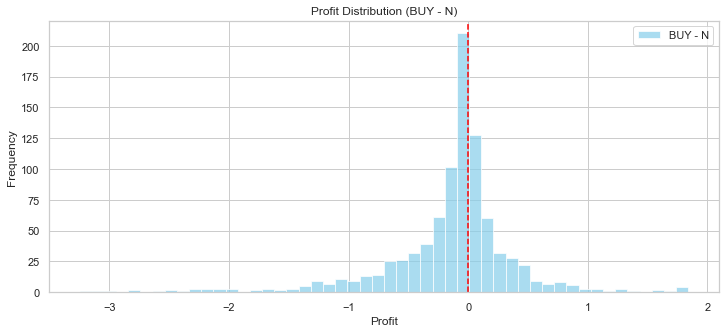

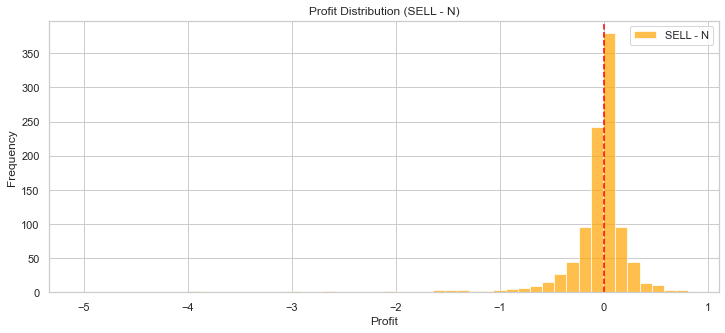


====== Analyzing for Horizon: N1 ======


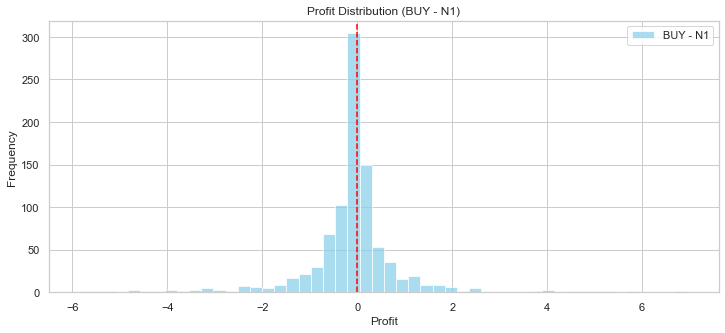

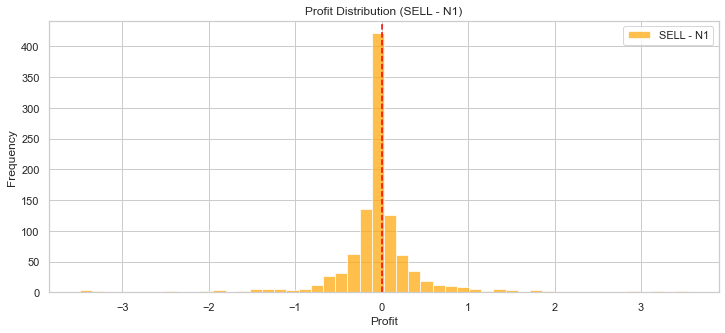


====== Analyzing for Horizon: N2 ======


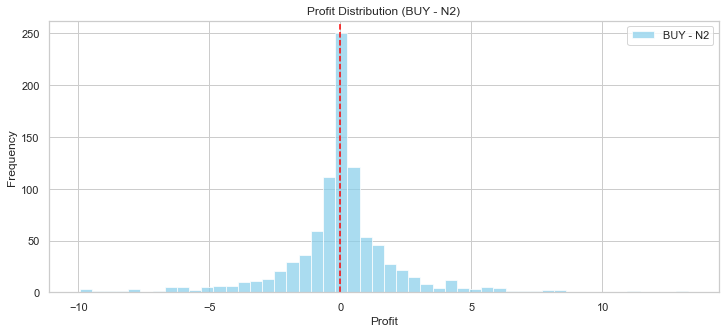

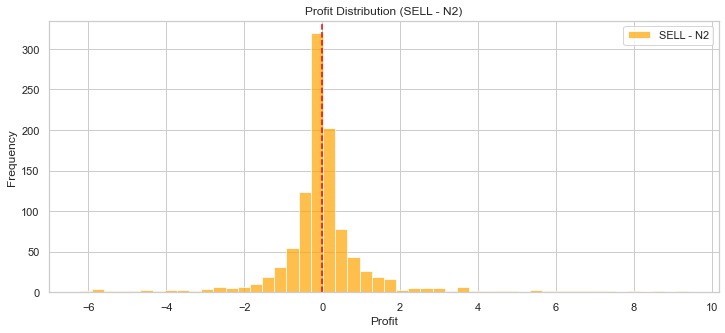


====== Analyzing for Horizon: N3 ======


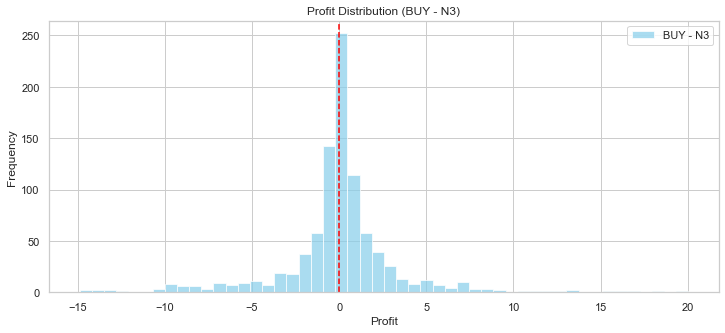

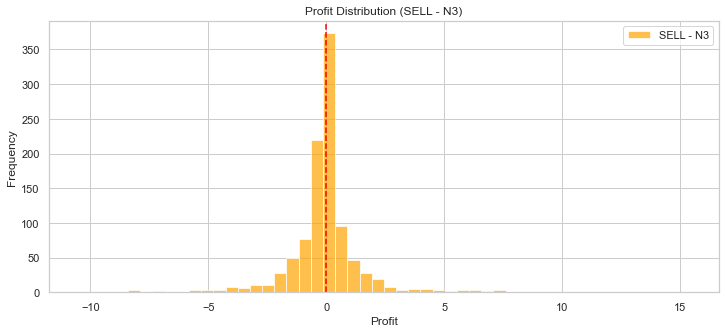

In [115]:
analyze_profitability_by_horizon(result)


In [118]:
def summarize_trade_success_rate(df):
    horizons = ['n', 'n1', 'n2', 'n3']

    for h in horizons:
        print(f"\n====== TRADE SUCCESS RATE for {h.upper()} ======")

        for action in ['BUY', 'SELL']:
            col = f'{action.lower()}_profit_{h}'
            if col in df.columns:
                subset = df[df['action'] == action][col].dropna()

                if subset.empty:
                    print(f"{action}: No data for {col}")
                    continue

                total_trades = len(subset)
                profitable_trades = (subset > 0).sum()
                success_rate = (profitable_trades / total_trades) * 100

                print(f"{action} → Profitable: {profitable_trades}/{total_trades} ({success_rate:.2f}%)")
            else:
                print(f"{action}: Column '{col}' not found in DataFrame.")

summarize_trade_success_rate(result)


====== TRADE SUCCESS RATE for N ======
BUY → Profitable: 332/932 (35.62%)
SELL → Profitable: 423/1056 (40.06%)

====== TRADE SUCCESS RATE for N1 ======
BUY → Profitable: 392/932 (42.06%)
SELL → Profitable: 407/1056 (38.54%)

====== TRADE SUCCESS RATE for N2 ======
BUY → Profitable: 473/932 (50.75%)
SELL → Profitable: 470/1056 (44.51%)

====== TRADE SUCCESS RATE for N3 ======
BUY → Profitable: 482/932 (51.72%)
SELL → Profitable: 480/1056 (45.45%)


In [119]:
def summarize_profitability(df):
    horizons = ['n', 'n1', 'n2', 'n3']

    for h in horizons:
        print(f"\n====== PROFIT SUMMARY for {h.upper()} ======")

        for action in ['BUY', 'SELL']:
            col = f'{action.lower()}_profit_{h}'
            if col in df.columns:
                subset = df[df['action'] == action][col].dropna()
                
                if subset.empty:
                    print(f"{action}: No data for {col}")
                    continue

                total = subset.sum()
                mean = subset.mean()
                median = subset.median()
                count = subset.count()

                result = "PROFIT" if total > 0 else "LOSS" if total < 0 else "BREAK-EVEN"

                print(f"{action} -> Trades: {count}, Total: {total:.2f}, Mean: {mean:.2f}, Median: {median:.2f} → Overall: {result}")
            else:
                print(f"{action}: Column '{col}' not found in DataFrame.")

summarize_profitability(result)


====== PROFIT SUMMARY for N ======
BUY -> Trades: 932, Total: -33.87, Mean: -0.04, Median: -0.04 → Overall: LOSS
SELL -> Trades: 1056, Total: -216.69, Mean: -0.21, Median: 0.00 → Overall: LOSS

====== PROFIT SUMMARY for N1 ======
BUY -> Trades: 932, Total: 0.88, Mean: 0.00, Median: -0.02 → Overall: PROFIT
SELL -> Trades: 1056, Total: -100.40, Mean: -0.10, Median: -0.02 → Overall: LOSS

====== PROFIT SUMMARY for N2 ======
BUY -> Trades: 932, Total: -92.44, Mean: -0.10, Median: 0.01 → Overall: LOSS
SELL -> Trades: 1056, Total: 93.44, Mean: 0.09, Median: -0.03 → Overall: PROFIT

====== PROFIT SUMMARY for N3 ======
BUY -> Trades: 932, Total: -15.43, Mean: -0.02, Median: 0.03 → Overall: LOSS
SELL -> Trades: 1056, Total: 184.51, Mean: 0.17, Median: -0.04 → Overall: PROFIT


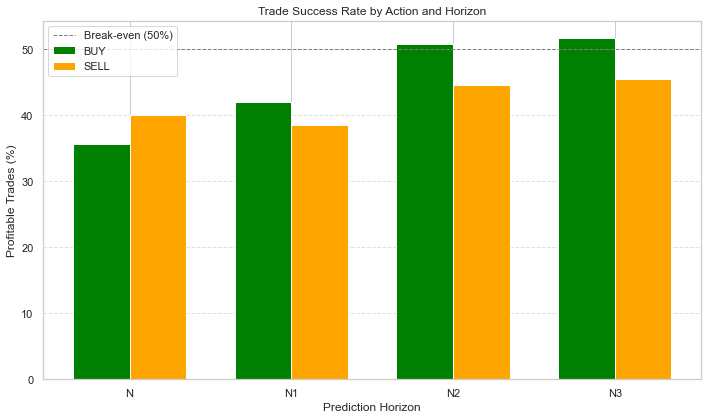

In [120]:
import matplotlib.pyplot as plt

def visualize_trade_success_rate(df):
    horizons = ['n', 'n1', 'n2', 'n3']
    actions = ['BUY', 'SELL']

    success_data = {action: [] for action in actions}

    for h in horizons:
        for action in actions:
            col = f'{action.lower()}_profit_{h}'
            if col in df.columns:
                subset = df[df['action'] == action][col].dropna()
                total = len(subset)
                if total == 0:
                    success_rate = 0
                else:
                    success_rate = (subset > 0).sum() / total * 100
                success_data[action].append(success_rate)
            else:
                success_data[action].append(0)  # Missing column, assume 0

    # Plotting
    x = range(len(horizons))
    width = 0.35

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar([i - width/2 for i in x], success_data['BUY'], width=width, label='BUY', color='green')
    ax.bar([i + width/2 for i in x], success_data['SELL'], width=width, label='SELL', color='orange')

    ax.set_xlabel("Prediction Horizon")
    ax.set_ylabel("Profitable Trades (%)")
    ax.set_title("Trade Success Rate by Action and Horizon")
    ax.set_xticks(x)
    ax.set_xticklabels([h.upper() for h in horizons])
    ax.axhline(50, color='gray', linestyle='--', linewidth=1, label='Break-even (50%)')
    ax.legend()
    ax.grid(True, axis='y', linestyle='--', alpha=0.6)

    plt.tight_layout()
    plt.show()

visualize_trade_success_rate(result)

In [121]:
pattern_weights = 
{'Bullish_Engulfing': 3,
 'Hammer': 2,
 'Doji': 0,
 'Shooting_Star': -2,
 'Bearish_Engulfing': -3}

{'Bullish_Engulfing': 3,
 'Hammer': 2,
 'Doji': 0,
 'Shooting_Star': -2,
 'Bearish_Engulfing': -3}